In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import skimage.io as io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian
import skimage.color as sColor
import skimage.transform as trs

import scipy.optimize


In [2]:
cards = io.imread_collection('../cards\*.jpg')


(840, 572, 3)

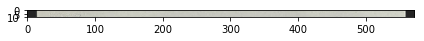

In [3]:
io.imshow(cards[5][20:30,:])
cards[5].shape

In [4]:
blurredImg = []
ratios = []
for img in tqdm(cards):
    temp = trs.resize(img[30:(img.shape[0]-70),30:(img.shape[1]-30)],(512,512))
    blurredImg.append(gaussian(sColor.rgb2grey(temp),sigma=7))
    ratios.append((512/(img.shape[0]-100),512/(img.shape[1]-60)))
    

100%|████████████████████████████████████████| 248/248 [00:14<00:00, 17.16it/s]


In [5]:
entropies = []
for img in tqdm(blurredImg):
    if np.max(img) >1:
        img = img/np.max(img)
    entropies.append(entropy(img,disk(10)))

  0%|                                                  | 0/248 [00:00<?, ?it/s]C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|████████████████████████████████████████| 248/248 [01:20<00:00,  3.07it/s]


C:\Users\Robin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


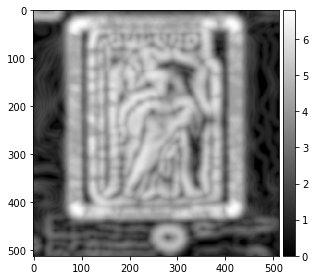

In [6]:
io.imshow(entropies[5],cmap = "gray")
plt.imsave("entropy.jpg",entropies[5],cmap="gray")

In [7]:
integral = []
for img in entropies:
    integral.append(trs.integral_image(np.clip(img,0,np.percentile(img.flatten(),80))))

In [8]:
Icropped = []
for img in cards:
    Icropped.append(trs.resize(img[30:(img.shape[0]-70),30:(img.shape[1]-30)],(512,512)))

# Function definitions 

In [9]:
def min_max(p,m):
    p = int(round(p))
    return max(0,min(p,m-1))
    

def cropping(x):
    i  =min_max(x[0],image.shape[0])
    j =min_max(x[1],image.shape[1])
    m = min_max(x[2],image.shape[0])
    y = min_max(x[3],image.shape[1])
    tempArea =float((m-i)*(y-j))
    totalArea = float((image.shape[0]*image.shape[1]))
    if(tempArea>0):
        tempMax = ((image[m,y]+image[i,j]-image[m,j] - image[i,y])/tempArea) + l1* tempArea/totalArea
        return -tempMax
    return 0



In [10]:
def optimize(cropzero):
    answer = scipy.optimize.minimize(cropping,cropzero,method = "Nelder-Mead")
    p=[0,0,0,0]
    p[0] = min_max(answer.x[0],512)
    p[1] = min_max(answer.x[1],512)
    p[2] = min_max(answer.x[2],512)
    p[3] = min_max(answer.x[3],512)
    a = (p[3]-p[1])*(p[2]-p[0])
    return p,(-answer.fun),a



In [11]:
def wrapper_function(image) : 
    bestguess = [0,0,0,0]
    bestEnt = 0
    bestArea=0
    tried=[]
    for i  in range(20):
        guess = [0,0,0,0]

        guess[0]= np.random.choice(range(255))
        guess[1]= np.random.choice(range(255))
        guess[2]= np.random.choice(range(256,511))
        guess[3]= np.random.choice(range(256,511))
        tempguess,tempEnt,area = optimize(guess)
        tried.append(tempEnt)
        if(tempEnt>bestEnt):

            init = guess
            bestEnt = tempEnt
            bestguess = tempguess
            bestArea = area
    return bestArea,bestguess,tried

        

(array([ 1.,  1.,  0.,  2.,  0.,  1.,  2.,  6.,  0.,  7.]),
 array([ 4.63818588,  4.71546265,  4.79273941,  4.87001617,  4.94729294,
         5.0245697 ,  5.10184646,  5.17912323,  5.25639999,  5.33367675,
         5.41095351]),
 <a list of 10 Patch objects>)

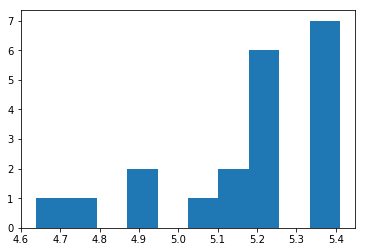

In [13]:
image = integral[5]
l1 = 1.8
plt.hist(algo(image)[2])

# Plot of the area cropped in function of lambda: 

In [14]:
areas = []
for image in tqdm(integral[0:10]):
    inner=[]
    for l1 in np.linspace(0,5,100):
         inner.append(algo(image)[0])
    areas.append(inner)

100%|██████████████████████████████████████████| 10/10 [01:32<00:00,  9.27s/it]


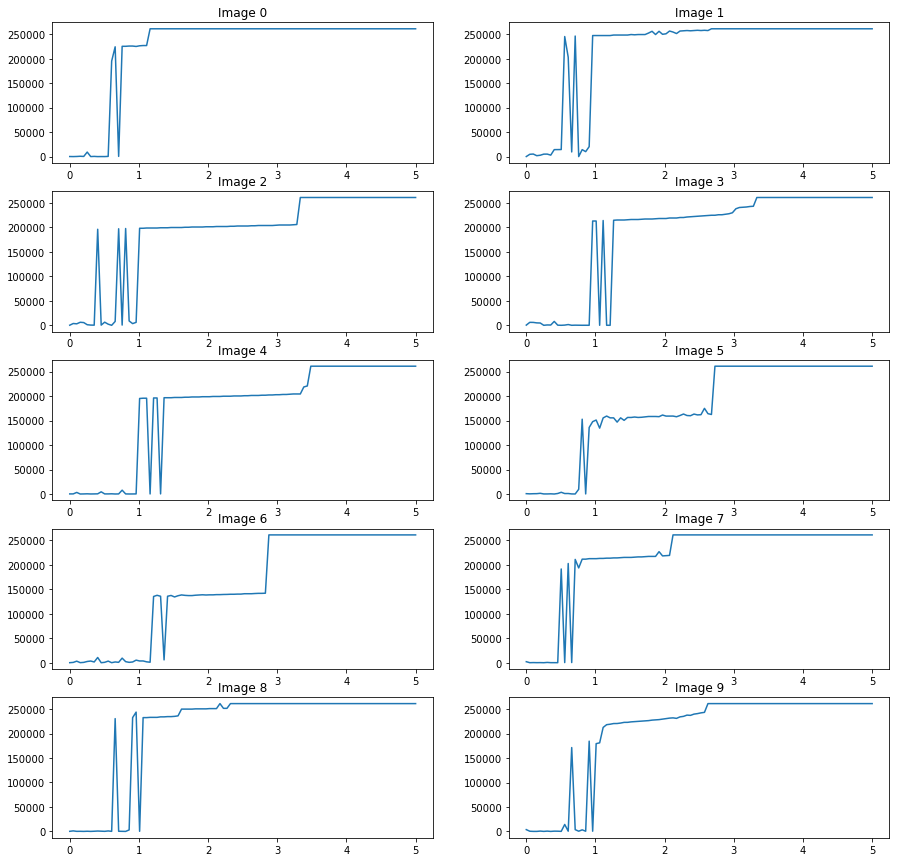

In [15]:
fig, ax = plt.subplots(5,2,figsize=(15,15))
for i in range(len(areas)):
    ax[int(i/2),i%2].set_title("Image " + str(i))
    ax[int(i/2),i%2].plot(np.linspace(0,5,100),areas[i])
   

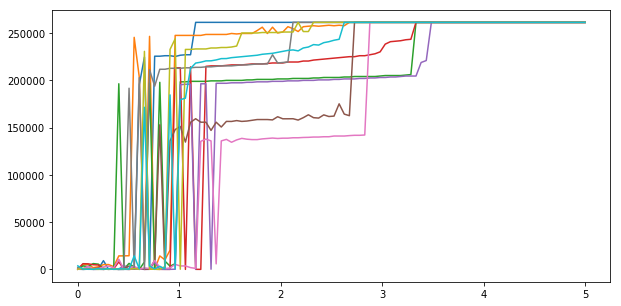

In [21]:
fig = plt.figure(figsize=(10, 5))

for i in range(len(areas)):
    plt.plot(np.linspace(0,5,100),areas[i])

fig.savefig("lambda.jpg")

100%|██████████████████████████████████████████| 10/10 [01:56<00:00, 11.62s/it]


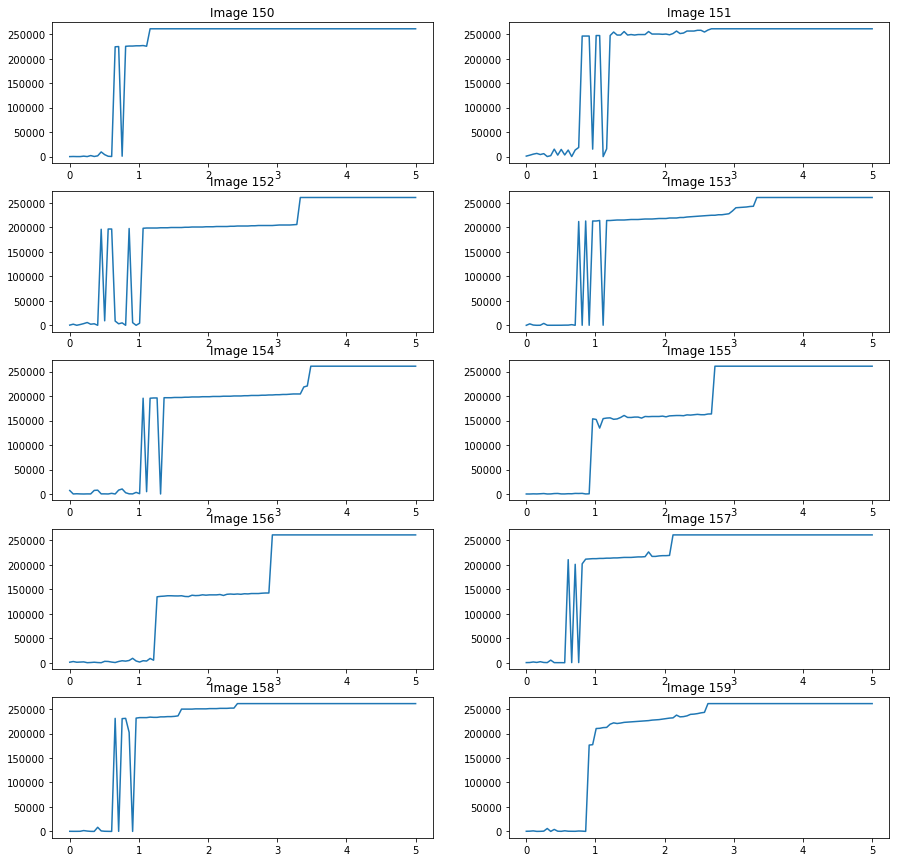

In [44]:
areas2 = []
for image in tqdm(integral[150:160]):
    inner=[]
    for l1 in np.linspace(0,5,100):
         inner.append(algo(image)[0])
    areas2.append(inner)
    
fig, ax = plt.subplots(5,2,figsize=(15,15))
for i in range(len(areas2)):
    ax[int(i/2),i%2].set_title("Image " + str(i + 150))
    ax[int(i/2),i%2].plot(np.linspace(0,5,100),areas[i])


# Plot of a non-working Image with L1  =2

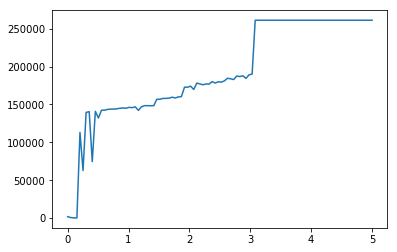

In [14]:
inner=[]
for l1 in np.linspace(0,5,100):
    inner.append(algo(integral[241])[0])
plt.plot(np.linspace(0,5,100),inner);

# Plot of a non working image with L1 = 1.8

(159909, [14, 92, 467, 445], [5.2888944898393806, 5.367724116150729, 5.372094014336561, 5.3722296148518609, 5.3714529483098925, 5.3374099849332088, 5.3722296148518609, 5.3676962514886393, 5.366275480292372, 5.3487030962510982, 5.3541186723764431, 5.0569017842607851, 4.5652229078918252, 5.3487030962510982, 5.3722296148518609, 5.3624687462109071, 5.3720561075610114, 5.3463385342573275, 5.3541186723764431, 5.3600151922611783])


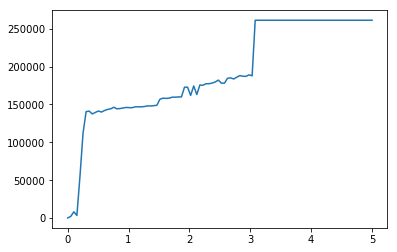

In [18]:
inner=[]
for l1 in np.linspace(0,5,100):
    inner.append(algo(integral[244])[0])
plt.plot(np.linspace(0,5,100),inner);
l1 = 1.8
print(algo(integral[244]))

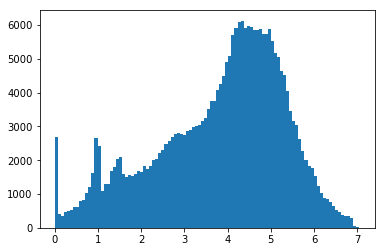

In [21]:
plt.hist(entropies[241].flatten(),100);

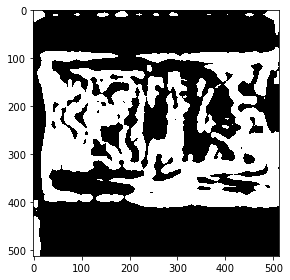

In [23]:
io.imshow(entropies[241]>4.5)

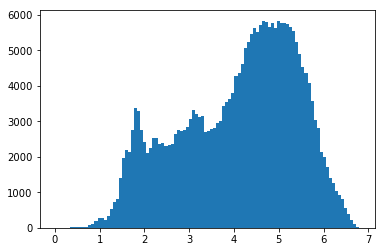

In [22]:
plt.hist(entropies[244].flatten(),100);

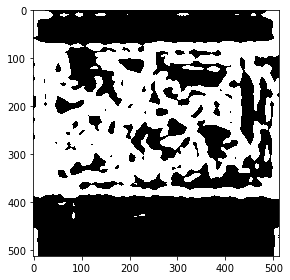

In [24]:
io.imshow(entropies[244]>4.5)

# Cropping all the 512x512 images and storing them

In [45]:
final = []
l1 = 1.8
for j in range(len(integral)):
    image =integral[j]
    finalArea,finalGuess,finalEnt = algo(image)
    im =Icropped[j][finalGuess[0]+15:finalGuess[2]-15,finalGuess[1]+15:finalGuess[3]-15]
    if(im.shape[0] <1 or im.shape[1]<1):
        im = Icropped[j][finalGuess[0]:finalGuess[2],finalGuess[1]:finalGuess[3]]
    final.append(im)
    

In [46]:
for i in range(len(final)):
    plt.imsave('cropped18/img'+ str(i)+'.jpg',final[i],cmap='gray')

# Cropping the actual images by respecting the ratio

In [10]:
bigCropped = []
for img in cards:
    bigCropped.append(img[30:(img.shape[0]-70),30:(img.shape[1]-30)])
    

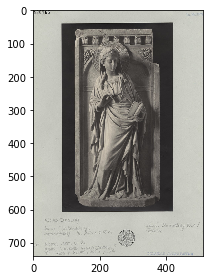

In [13]:
io.imshow(bigCropped[5])

In [17]:
final = []
l1 = 1.8
for j in range(len(integral)):
    
    image =integral[j]
    finalArea,finalGuess,finalEnt = algo(image)
    ratioGuess = [0,0,0,0]
    ratioGuess[0] = int(finalGuess[0]/ratios[j][0])
    ratioGuess[1] = int(finalGuess[1]/ratios[j][1])
    ratioGuess[2] = int(finalGuess[2]/ratios[j][0])
    ratioGuess[3] = int(finalGuess[3]/ratios[j][1])
    tresh0 = int(15/ratios[j][0])
    tresh1 = int(15/ratios[j][1])
    im =bigCropped[j][ratioGuess[0]+tresh0:ratioGuess[2]-tresh0,ratioGuess[1]+tresh1:ratioGuess[3]-tresh1]
    if(im.shape[0] <1 or im.shape[1]<1):
        im = bigCropped[j][ratioGuess[0]:ratioGuess[2],ratioGuess[1]:ratioGuess[3]]
    final.append(im)

In [18]:
for i in range(len(final)):
    plt.imsave('../ratio2/img'+ str(i)+'.jpg',final[i],cmap='gray')

(790, 740, 3)


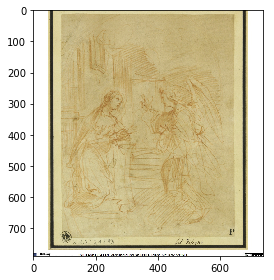

In [24]:
io.imshow(bigCropped[1])
print(bigCropped[1].shape)

# Histogram of pixels entropies

In [56]:
flatEnt = entropies[5].flatten()

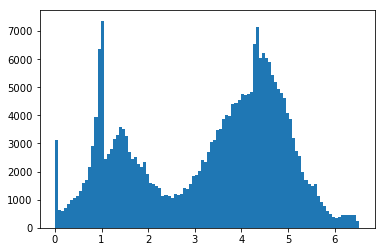

In [57]:
plt.hist(flatEnt,100);

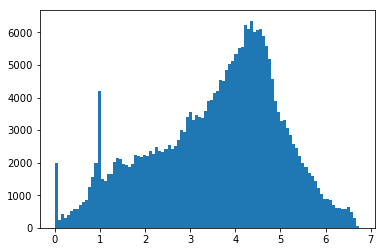

In [58]:
flatEnt241 = entropies[241].flatten()
plt.hist(flatEnt241,100);

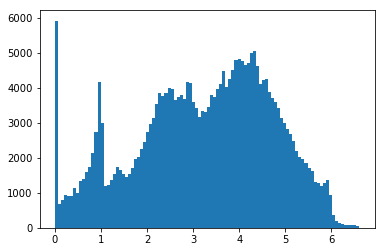

In [23]:
flatEnt241 = entropies[229].flatten()
plt.hist(flatEnt241,100);